# Zindi Crop Disease

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 11.0MB/s 
     |████████████████████████████████| 1.2MB 23.5MB/s 
     |████████████████████████████████| 194kB 30.4MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 12.8MB 231kB/s 
     |████████████████████████████████| 776.8MB 24kB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [6]:
#hide
from fastbook import *
from fastai.vision.all import *

In [7]:
path = Path("/content/gdrive/MyDrive/AI Machine Learning/images/CropDisease/train/train")

In [54]:
def real_parent(p):
  return "leaf_rust stem_rust healthy_wheat".split(' ')

In [55]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_y=real_parent,
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [56]:
dls = dblock.dataloaders(path)

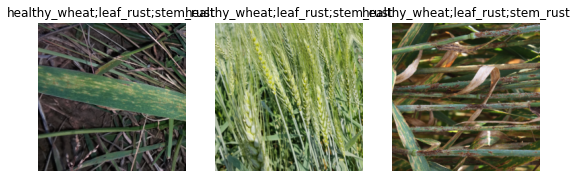

In [57]:
dls.show_batch(nrows=1, ncols=3)

In [ ]:
learn = cnn_learner(data, resnet18, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [59]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(15, base_lr=4.37e-04)

epoch,train_loss,valid_loss,error_rate,time


AssertionError: ignored

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

In [ ]:
img = PILImage.create('/content/gdrive/MyDrive/AI Machine Learning/images/CropDisease/test/test/008FWT.JPG')

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
learn_inf.predict(img)